## Qiskit Basics

To begin, we'll need to import the following qiskit libraries, along with numpy, cmath, and an additional module I've written called qis401 that contains a couple wrapper functions. (You can find <code>qis401.py</code> in the course documents on Canvas; be sure to move this file to your working directory.)  

Note: In qiskit, 01 is 10 and 10 is 01

In [1]:
import numpy as np, cmath
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, state_visualization
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city 
import qis401 # written for CS 401 

### Creating and Simulating Quantum Circuits

The below code constructs a 1-qubit quantum circuit that performs Hadamard gate, then X gate, then Z gate.

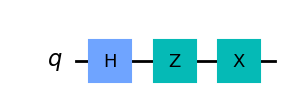

In [2]:
circ = QuantumCircuit(1)  # pass in 1 to specify circuit has 1 qubit
circ.h(0)                 # pass in index of qubit you want to perform the gate on (0-indexed)
circ.z(0)
circ.x(0)
circ.draw('mpl')          # displays circuit as a diagram

Once we've constructed a circuit object, we can then use the <code>qis401</code> function <code>simulate_circuit(circ)</code> to return a "result object" that encapsulates various meta data related to the final quantum state of the circuit, along with information about its simulation (i.e., "simulating" the circuit in fact repeatedly measures the final state and aggregates the results). You can look at <code>qis401.py</code> to see what qiskit methods are being called to run the simulation.

In [3]:
result = qis401.simulate_circuit(circ, 2000)  # simulate circuit 2000 times
print(result)

Result(backend_name='aer_simulator', backend_version='0.11.2', qobj_id='f4377ef7-ac72-424b-b04e-bd5506aead0c', job_id='666a7616-a83b-4972-a1d9-c65ed71b136e', success=True, results=[ExperimentResult(shots=2000, success=True, meas_level=2, data=ExperimentResultData(statevector=Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata={}, n_qubits=1, name='circuit-87', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=939070610, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [0], 'measure_sampling': True, 'num_clbits': 0, 'input_qubit_map': [[0, 0]], 'num_qubits': 1, 'method': 'statevector', 'result_subtypes': {'statevector': 'single'}, 'result_types': {'statevector': 'save_statevector'}, 'fusion': {'applied': False

We can then obtain a "Statevector" object from the result object by calling the method <code>get_statevector()</code>. A Statevector object is essentially just an array that stores the amplitudes of each basis vector in the output quantum state (that is designed to play nicely with other functionality in qiskit). 

In [4]:
output_state = result.get_statevector()

We can then pass the this Statevector object into the wrapper function <code>qis401.bra_ket_latex()</code> to generate a LaTeX graphic showing the corresponding state in bra-ket notation.

In [5]:
output_state = result.get_statevector()
qis401.bra_ket_latex(output_state)

<IPython.core.display.Latex object>

Note that $\frac{\sqrt{2}}{2} = \frac{1}{\sqrt{2}}$.

We can also display a histogram that gives the aggregate results of the simulation.

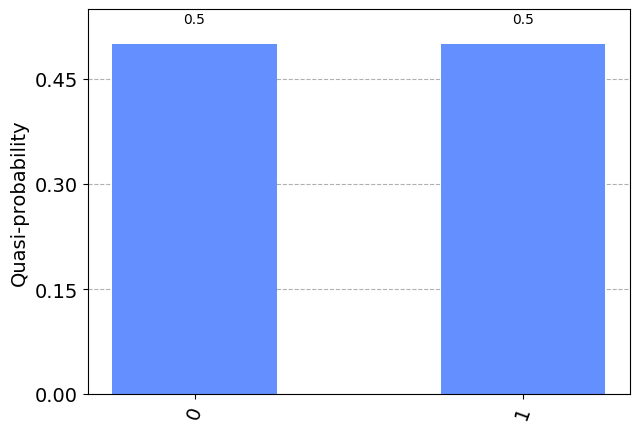

In [6]:
plot_histogram(result.get_counts())

### Multi-qubit Circuits

Below is an example of two qubit circuit that peforms controlled-not gate:

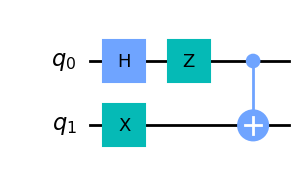

In [7]:
circ = QuantumCircuit(2)  
circ.x(1)
circ.h(0)
circ.z(0)
circ.cx(0, 1)      # parameters: (control qubit index, target qubit index)
circ.draw('mpl')

In [8]:
result = qis401.simulate_circuit(circ)
qis401.bra_ket_latex(result.get_statevector())

<IPython.core.display.Latex object>

Notice that based on the bra-ket calculations we've done in class, we should expect to obtain the following final state (where we first apply the $H$ gate on $q_0$, then $X$ gate on $q_1$, then $Z$ gate on $q_0$, and then $CX$ gate with $q_0$ and $q_1$ as the control and target, respectively):

$ |00|\rangle 
\rightarrow \frac{\sqrt{2}}{2}|00\rangle + \frac{\sqrt{2}}{2}|10\rangle 
\rightarrow \frac{\sqrt{2}}{2}|01\rangle + \frac{\sqrt{2}}{2}|11\rangle 
\rightarrow \frac{\sqrt{2}}{2}|01\rangle - \frac{\sqrt{2}}{2}|11\rangle 
\rightarrow \frac{\sqrt{2}}{2}|01\rangle - \frac{\sqrt{2}}{2}|10\rangle $

In particular, the negative sign seems to be on the wrong ket!

Thus note (<b>important</b>!) that Qiskit enumerates its kets/basis states in *reverse order*, i.e., the right-most digit corresponds to the first qubit, instead of the left-most digit (this is discussed in the blue box in the [Qiskit getting started page](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html).) You can also notice why the negative term appears first in the Statevector example given above for the single qubit circuit.

### Register Objects and Measurement

Instead of referring to qubits using indices, it is often more useful to construct "quantum register" objects, which allow us designate and interact with each qubit in an object oriented manner. Register objects are then passed into the circuit constructor to initialize the circuit. To add quantum gates to the circuit, we then pass in the corresponding register object to the gate function. 

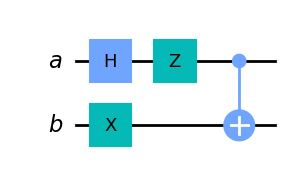

In [9]:
a_reg = QuantumRegister(1, "a")      # 1 indicates the register contains 1 qubit, second parameter is label
b_reg = QuantumRegister(1, "b")
circ = QuantumCircuit(a_reg, b_reg)  # pass in register objects to construct the circuit 
circ.x(b_reg)                        # pass in register objects to gate functoins to design the circuit
circ.h(a_reg)                       
circ.z(a_reg)
circ.cx(a_reg, b_reg)    
circ.draw('mpl')

When we want the circuit to measure qubits, we need add objects for classical registers. We can then use the <code>measure()</code> method to peform a measurement on a qubit and store the result in a classical register. 

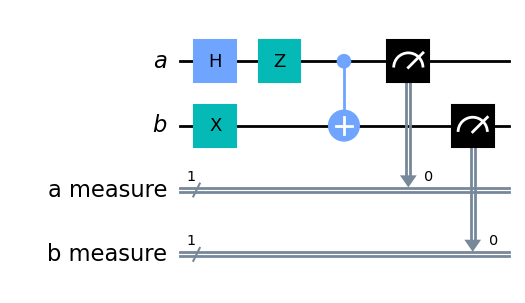

In [10]:
# initailize registers and circuit objects
a_reg = QuantumRegister(1, "a")     
b_reg = QuantumRegister(1, "b")
ameas_reg = ClassicalRegister(1, "a measure")
bmeas_reg = ClassicalRegister(1, "b measure")
circ = QuantumCircuit(a_reg, b_reg, ameas_reg, bmeas_reg)  

# construct the circuit
circ.x(b_reg)                      
circ.h(a_reg)                       
circ.z(a_reg)
circ.cx(a_reg, b_reg)  
circ.measure(a_reg, ameas_reg)  # parameters (Quantum Register, Classical Register storing result)
circ.measure(b_reg, bmeas_reg)

# display circuit
circ.draw('mpl')

Example where we add a quantum gate that executes conditionally based on a previous measurement using the <code>c_if()</code> method.  

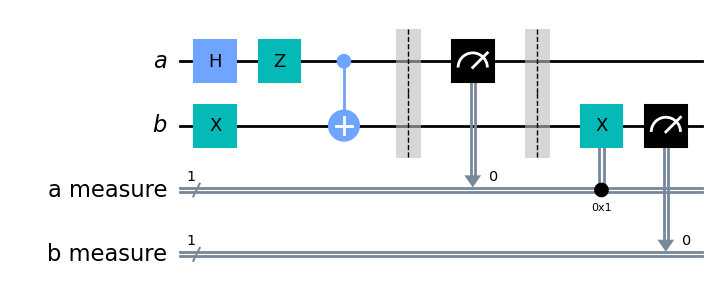

In [11]:
# initailize registers and circuit objects
a_reg = QuantumRegister(1, "a")     
b_reg = QuantumRegister(1, "b")
ameas_reg = ClassicalRegister(1, "a measure")
bmeas_reg = ClassicalRegister(1, "b measure")
circ = QuantumCircuit(a_reg, b_reg, ameas_reg, bmeas_reg)  

# gates before measurement of a
circ.x(b_reg)                      
circ.h(a_reg)                       
circ.z(a_reg)
circ.cx(a_reg, b_reg) 
circ.barrier()         # barrier() is used to organize circuit into segments (does not affect outcome)
    
# measure a
circ.measure(a_reg, ameas_reg)  # parameters: (Quantum Register, Classical Register storing result)
circ.barrier()

# execute X gate on b if result of a measurement = 1, and then measure b
circ.x(b_reg).c_if(ameas_reg, 1)           
circ.measure(b_reg, bmeas_reg)

# display circuit
circ.draw('mpl')

## Quantum Circuits as NumPy Matrices

In [12]:
h = np.array([[1/cmath.sqrt(2), 1/cmath.sqrt(2)], [1/cmath.sqrt(2), -1/cmath.sqrt(2)]])
print(h)

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


In [13]:
start = np.array([1, 0])
output = h @ start
print(output)

[0.70710678+0.j 0.70710678+0.j]


In [17]:
output_sv = Statevector(output)
qis401.bra_ket_latex(output_sv)

<IPython.core.display.Latex object>

Recall the corresponding matrix operations in quantum circuit from the Lecture 6 
<div align="center">
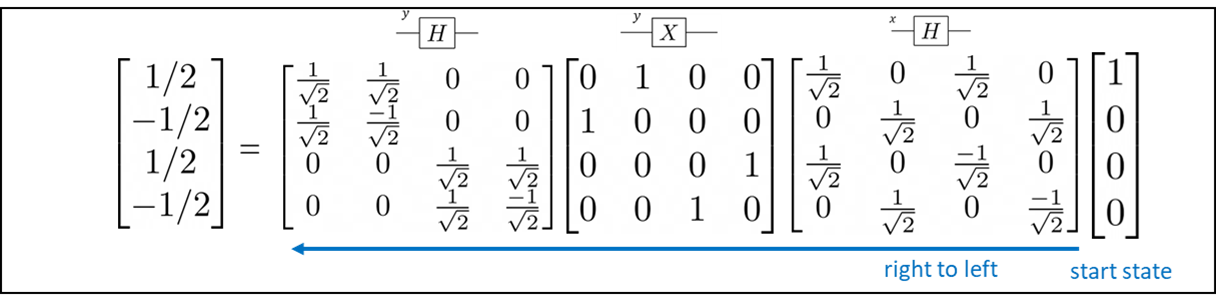
</div>

In [15]:
start = np.array([1, 0, 0, 0])
h = np.array([[1/cmath.sqrt(2), 1/cmath.sqrt(2)], [1/cmath.sqrt(2), -1/cmath.sqrt(2)]])
x =  np.array([[0, 1], [1, 0]])
i =  np.array([[1, 0], [0, 1]])

gate1 = np.kron(h, i)
gate2 = np.kron(i, x)
gate3 = np.kron(i, h)

output = gate3 @ gate2 @ gate1 @ start
output_sv = Statevector(output)
qis401.bra_ket_latex(output_sv)

<IPython.core.display.Latex object>

## Practice Problems

#### Problem 1: Qiskit Circuits for Bell States

Recall the following entangled quantum state, known as the EPR pair:

$$ \frac{|00\rangle + |11\rangle}{\sqrt{2}}.$$

More generally, the EPR pair is one four possible entangled quantum states known as the <i>Bell states</i>, denoted $\beta_{00}, \beta_{01}, \beta_{10}, \beta_{11}$, where the EPR pair corresponds to the Bell state $\beta_{00}$. The remaining three Bell states are defined as follows:

$$ \beta_{01} = \frac{|01\rangle + |10\rangle}{\sqrt{2}}$$
$$ \beta_{10} = \frac{|00\rangle - |11\rangle}{\sqrt{2}}$$
$$ \beta_{11} = \frac{|01\rangle - |10\rangle}{\sqrt{2}}.$$

Use qiskit to design three separate 2-qubit circuits that transform the starting state $|00\rangle$ to the Bell states $\beta_{01}, \beta_{10}$, and $\beta_{11}$ (i.e. one circuit for each Bell state). Have your code display each circuit, and then use the function <code>qis401.bra_ket_latex()</code> to verify each circuit reaches the desired Bell state. 

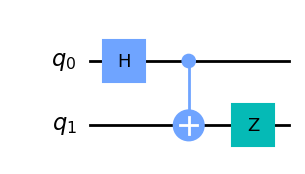

In [19]:
# YOUR CODE GOES HERE (create additional cells as needed)

# State 10
circ = QuantumCircuit(2)  
circ.h(0)
circ.cx(0, 1)      # parameters: (control qubit index, target qubit index)
circ.z(1)
circ.draw('mpl')

In [20]:
result = qis401.simulate_circuit(circ)
qis401.bra_ket_latex(result.get_statevector())

<IPython.core.display.Latex object>

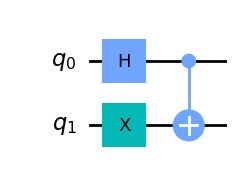

In [21]:
# State 01
circ = QuantumCircuit(2)  
circ.h(0)
circ.x(1)
circ.cx(0, 1)
circ.draw('mpl')

In [22]:
result = qis401.simulate_circuit(circ)
qis401.bra_ket_latex(result.get_statevector())

<IPython.core.display.Latex object>

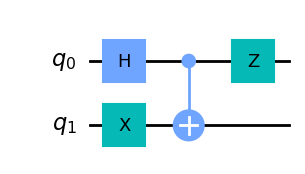

In [34]:
# State 11
circ = QuantumCircuit(2)  
circ.h(0)
circ.x(1)
circ.cx(0, 1)
circ.z(0)
circ.draw('mpl')

In [35]:
result = qis401.simulate_circuit(circ)
qis401.bra_ket_latex(result.get_statevector())

<IPython.core.display.Latex object>

#### Problem 2: NumPy Matrices for Bell States

Repeat the same exercise in Problem 1, but now implement your circuit with NumPy matrices. Again test that your final states are correct using the <code>qis401.bra_ket_latex()</code> function.  

In [27]:
# YOUR CODE GOES HERE (create additional cells as needed)

# State 01
start = np.array([1, 0, 0, 0])
cx = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
h = np.array([[1/cmath.sqrt(2), 1/cmath.sqrt(2)], [1/cmath.sqrt(2), -1/cmath.sqrt(2)]])
x =  np.array([[0, 1], [1, 0]])
i =  np.array([[1, 0], [0, 1]])

gate1 = np.kron(h, i)
gate2 = np.kron(i, x)
gate3 = np.kron(i, h)

output = cx @ gate2 @ gate1 @ start
output_sv = Statevector(output)
qis401.bra_ket_latex(output_sv)

<IPython.core.display.Latex object>

In [29]:
# State 10
start = np.array([1, 0, 0, 0])
cx = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
h = np.array([[1/cmath.sqrt(2), 1/cmath.sqrt(2)], [1/cmath.sqrt(2), -1/cmath.sqrt(2)]])
x =  np.array([[0, 1], [1, 0]])
i =  np.array([[1, 0], [0, 1]])
z = np.array([[1, 0], [0, -1]])

gate1 = np.kron(h, i)
gate2 = np.kron(i, x)
gate3 = np.kron(i, z)

output = gate3 @ cx @ gate1 @ start
output_sv = Statevector(output)
qis401.bra_ket_latex(output_sv)

<IPython.core.display.Latex object>

In [36]:
# State 11
start = np.array([1, 0, 0, 0])
cx = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
h = np.array([[1/cmath.sqrt(2), 1/cmath.sqrt(2)], [1/cmath.sqrt(2), -1/cmath.sqrt(2)]])
x =  np.array([[0, 1], [1, 0]])
i =  np.array([[1, 0], [0, 1]])
z = np.array([[1, 0], [0, -1]])

gate1 = np.kron(h, i)
gate2 = np.kron(i, x)
gate3 = np.kron(z, i)

output = gate3 @ cx @ gate2 @ gate1 @ start
output_sv = Statevector(output)
qis401.bra_ket_latex(output_sv)

<IPython.core.display.Latex object>